<a href="https://colab.research.google.com/github/annesantos1990/diversity_analysis/blob/main/analise_diversidade__Eslaine_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Diversidade - Curso PrograMaria

Eslaine Santos

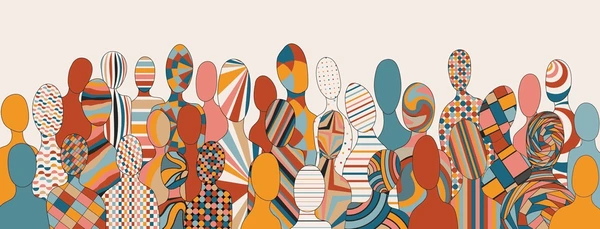

Notebook com a análise de diversidade na área de dados. Foi analisada variáveis como gênero, idade, raça/etnia, entre outros aspectos.

Aqui foram feitos:

- Limpeza e Tratamento dos dados;
- Análise Exploratória dos Dados;
- Análises Estatísticas;
- Algumas visualizações.

Para visualizar o dashboard construído com os dados tratados nesse notebook, acesse o link abaixo:

https://lookerstudio.google.com/reporting/7c9deb04-7e25-4807-8f1d-f3ebc16e1c6b

Para visualizar o modelo de regressão linear, que teve como propósito prever o salário dos profissionais da área de dados a partir de difenrentes variáveis como cor, anos de experiencia, nivel de ensino, gênero, idade, entre outras, clique no link abaixo:

https://colab.research.google.com/drive/1tigQH9NniACN7Gj_PwdgPg8SgfMAIrf8?usp=sharing

# Importações

In [ ]:
#Importações:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy import stats

# Uso da biblioteca pandas

In [ ]:
# Montando o drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lendo os dados
dados = pd.read_excel('/content/drive/MyDrive/PrograMaria - Análise de Dados/Módulo 3/planilha_modulo3.xlsx')

In [ ]:
licitacoes = pd.read_excel('/content/drive/MyDrive/PrograMaria - Análise de Dados/Módulo 3/licitacoes.xlsx')

In [ ]:
dados_2 = pd.read_excel('/content/drive/MyDrive/PrograMaria - Análise de Dados/Módulo 4/Planilha_Aula_parte2 - Eslaine.xlsx')

In [ ]:
licitacoes['Situação Licitação'].value_counts()

,count
Situação Licitação,
Encerrado,9016
Publicado,3709
Evento de Resultado de Julgame,1922
Retificação,127
Evento de Alteração Publicad,93
Evento de Suspensão Publicado,72
Anulação,67
Revogação,63
Divulgado,55


In [ ]:
dados.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0


.shape - retorna a quatidade de linhas e coolunas (nessa ordem)

In [ ]:
#.shape

dados.shape

(4271, 28)

# Repetindo Análise do Excel

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

Filtro: df[df[coluna]='valor']

In [ ]:
dados[dados['GENERO']=='Feminino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
#tudo menos o valor que eu colocar - colocar !

dados[dados['GENERO']!='Masculino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
#esse filtro mostra como procurar uma palava especifica na coluna
dados[dados['GENERO'].str.contains('não', na = False)]

#na=False: Isso significa que, se houver valores NaN (valores ausentes) na coluna 'GENERO', eles serão tratados como False, ou seja, não serão incluídos no filtro.

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


In [ ]:
dados[dados['IDADE'] > 30]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,62001.0
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0


In [ ]:
dados[(dados['IDADE'] > 30 )& (dados['GENERO'] == 'Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
23,23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,de 5 a 6 anos,13418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,4214,0gprow0ownrbfneftxf0gprow4kyrqdy,41.0,40-44,Feminino,Branca,Prefiro não informar,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Seguros ou Previdência,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,11452.0
4221,4221,0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d,34.0,30-34,Feminino,Outra,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5687.0
4240,4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Menos de 1 ano,1182.0
4247,4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor de Energia,de 11 a 50,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,5925.0


In [ ]:
# cor/ raça amarela
dados[dados['COR/RACA/ETNIA']=='Amarela']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,zbukfwxvpwlk6loglm0zbukfwx6bvyb6,40.0,40-44,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Mais de 10 anos,11388.0
107,107,z9toybzbja7n6xjjbz9f8hmofrry69tg,44.0,40-44,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Indústria,Acima de 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,Mais de 10 anos,14500.0
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0
4210,4210,0hbwm1d1wz739r40hbwm1df6ky5kn4ap,43.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Sênior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Mais de 10 anos,7131.0
4257,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,62001.0


Valores Únicos:

In [ ]:
dados['GENERO'].unique()

array(['Masculino', 'Feminino', nan, 'Prefiro não informar'], dtype=object)

value_counts() - contabiliza quantas ocorrencias temos de cada valor naquela coluna.

In [ ]:
dados['GENERO'].value_counts()

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12


In [ ]:
# contando nulos da coluna GENERO
dados['GENERO'].isnull().sum()

9

In [ ]:
dados[dados['IDADE']<40]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
6,6,zytlxsdgalh22cgrijvzytlxa49i8yzx,21.0,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,4491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,4265,01nmlhyw8w2b4stchg01nmlvlcqp0iis,28.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Marketing,de 1 a 5,0.0,NaN,Analista de Marketing,Pleno,de R$ 2.001/mês a R$ 3.000/mês,de 3 a 4 anos,de 1 a 2 anos,2348.0
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0


In [ ]:
dados[(dados['COR/RACA/ETNIA']=='Amarela') & (dados['IDADE']<40)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
170,170,yri3z491ejizlpj9ylu2k3jyri3z4915,34.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,16650.0
195,195,yjbpxmkqz5yidh5oszyjbpxmkgcb1zd9,32.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,3947,2tnsh0gxdu3aq4z2d2tnsh0hk15brx7q,31.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,False,...,Tecnologia/Fábrica de Software,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 25.001/mês a R$ 30.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,29408.0
4058,4058,1t3ndwx8j50k0bz1t3ndwxdpwyg17c2k,27.0,25-29,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Nível de cobrança no trabalho / Stress no trab...,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,14175.0
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0


## Somando a quantidade de pessoas por gênero

In [ ]:
dados2 =dados.groupby('GENERO', dropna= False)['ID'].nunique()
dados2

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados3 = dados['GENERO'].value_counts()
dados3

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12


In [ ]:
dados3 = dados['GENERO']. value_counts(dropna=False)
dados3

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12
NaN,9


## Contagem de pessoas por por nível acima de 30 anos

In [ ]:
dados[dados['IDADE']>30]['NIVEL'].value_counts()

,count
NIVEL,
Sênior,525
Pleno,408
Júnior,274


In [ ]:
# quantidade de mulheres acima de 30 anos por nível
dados[(dados['IDADE']>30 ) & (dados['GENERO']=='Feminino')]['NIVEL'].value_counts()

,count
NIVEL,
Pleno,117
Sênior,114
Júnior,96


## Tabela dinamica no pandas

In [ ]:
pd.pivot_table(dados, values='ID', index='GENERO', columns='GESTOR?', aggfunc='count')

GESTOR?,0.0,1.0
GENERO,,
Feminino,754,132
Masculino,2212,578
Prefiro não informar,9,2


# Estatística


In [ ]:
import numpy as np

In [ ]:
lista_idades =[26,30,32,22, 26, 35,40, 20, 43, 31, 23]

In [ ]:
np.sum(lista_idades)

328

In [ ]:
#média
np.sum(lista_idades)/len(lista_idades)

29.818181818181817

In [ ]:
media = np.mean(lista_idades)
print("Media aritmetica:", media)

Media aritmetica: 29.818181818181817


In [ ]:
#colocando em ordem crescente minha lista:
np.sort(lista_idades)

array([20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43])

In [ ]:
#ou
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]

In [ ]:
mediana = np.median(lista_idades)
print("Mediana:", mediana)

Mediana: 30.0


#### Voltando para a tabela

In [ ]:
#média
dados['IDADE'].mean()

31.169168453657374

In [ ]:
#mediana
dados['IDADE'].median()

30.0

In [ ]:
#moda
dados['IDADE'].mode()

,IDADE
0,27.0


In [ ]:
#desvio padrão
dados['IDADE'].std()

6.902802832143122

In [ ]:
#maximo
dados['IDADE'].max()

54.0

In [ ]:
#minimo
dados['IDADE'].min()

18.0

In [ ]:
dados.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0


In [ ]:
dados[dados['GENERO']=='Feminino']['IDADE'].mean()

31.318051575931232

In [ ]:
dados[dados['GENERO']=='Masculino']['IDADE'].mean()

31.147876077930373

In [ ]:
dados[dados['GENERO']=='Feminino']['SALARIO'].mean()

8673.22460496614

Informações sobre salário

In [ ]:
dados['SALARIO'].max()

485191.0

In [ ]:
dados['SALARIO'].min()

35.0

In [ ]:
dados['SALARIO'].mean()

10969.26691932864

In [ ]:
dados[dados['GENERO']=='Feminino']['SALARIO'].mean()

8673.22460496614

In [ ]:
dados[dados['GENERO']=='Masculino']['SALARIO'].mean()

11724.552688172043

O salário médio das mulheres é menor

# Valores Faltantes

In [ ]:
print(dados.isnull().sum())

Unnamed: 0                                                                                                                      0
ID                                                                                                                              0
IDADE                                                                                                                          74
FAIXA IDADE                                                                                                                     0
GENERO                                                                                                                          9
COR/RACA/ETNIA                                                                                                                  0
PCD                                                                                                                             0
EXPERIENCIA_PROFISSIONAL_PREJUDICADA                                                      

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].count()

,ID
GENERO,
Feminino,1056
Masculino,3194
Prefiro não informar,12
NaN,9


Preenchendo os valores nulos com outros valores

In [ ]:
dados['GENERO'].fillna('Prefiro não informar', inplace=True)

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()


,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


### Trabalhando coluna Idade

In [ ]:
# contando os valores nulos da coluna idade
dados['IDADE'].isnull().sum()

74

In [ ]:
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
media_17_21 = dados[dados['FAIXA IDADE']=='17-21']['IDADE'].mean()
media_17_21

20.205479452054796

In [ ]:
media_55 = dados[dados['FAIXA IDADE']=='55+']['IDADE'].mean()
media_55

nan

Nesse caso não temos uma média para os valores +55. Então vamos substituir pela média geral.
Já para o caso da faixa 17 - 21 temos como obsubstituuir pela média:

In [ ]:
dados.loc[dados['IDADE'].isnull() & (dados['FAIXA IDADE']=='17-21'), 'IDADE'] = media_17_21

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68


In [ ]:
dados.loc[dados['IDADE'].isnull() & (dados['FAIXA IDADE']=='55+'), 'IDADE'] = media_55

In [ ]:
media_geral_idade = dados['IDADE'].mean()
media_geral_idade

31.153517220250375

In [ ]:
dados.loc[dados['IDADE'].isnull(), 'IDADE'] = media_geral_idade

In [ ]:
#verificando os valores nulos da tabela idade para cada faixa de idade
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


Não tem mais valores nulos

### Trantando a coluna salário

In [ ]:
dados['SALARIO'].isnull().sum()

577

In [ ]:
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


In [ ]:
mediana_salario = dados['SALARIO'].median()
mediana_salario

7625.5

In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

In [ ]:
dados['SALARIO'].isnull().sum()

0

## Valores Faltantes - tabela licitacoes

In [ ]:
licitacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15336 entries, 0 to 15335
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Número Licitação          15336 non-null  int64         
 1   Código UG                 15336 non-null  int64         
 2   Nome UG                   15336 non-null  object        
 3   Código Modalidade Compra  15336 non-null  int64         
 4   Modalidade Compra         15336 non-null  object        
 5   Número Processo           15336 non-null  object        
 6   Objeto                    15336 non-null  object        
 7   Situação Licitação        15336 non-null  object        
 8   Código Órgão Superior     15336 non-null  int64         
 9   Nome Órgão Superior       15336 non-null  object        
 10  Código Órgão              15336 non-null  int64         
 11  Nome Órgão                15336 non-null  object        
 12  UF                

In [ ]:
#identificando a quantidade de dados faltantes
print(licitacoes.isnull().sum())

Número Licitação                0
Código UG                       0
Nome UG                         0
Código Modalidade Compra        0
Modalidade Compra               0
Número Processo                 0
Objeto                          0
Situação Licitação              0
Código Órgão Superior           0
Nome Órgão Superior             0
Código Órgão                    0
Nome Órgão                      0
UF                              0
Município                       0
Data Resultado Compra           0
Data Abertura               10648
Valor Licitação                 0
dtype: int64


In [ ]:
#substituindo os valores faltantes da colua "Data Abertura" pelo valor "Não Informado"
licitacoes['Data Abertura'].fillna('00/00/0000', inplace=True)

<ipython-input-73-11b53c51c605>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '00/00/0000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  licitacoes['Data Abertura'].fillna('00/00/0000', inplace=True)


In [ ]:
print(licitacoes.isnull().sum())

Número Licitação            0
Código UG                   0
Nome UG                     0
Código Modalidade Compra    0
Modalidade Compra           0
Número Processo             0
Objeto                      0
Situação Licitação          0
Código Órgão Superior       0
Nome Órgão Superior         0
Código Órgão                0
Nome Órgão                  0
UF                          0
Município                   0
Data Resultado Compra       0
Data Abertura               0
Valor Licitação             0
dtype: int64


## Valores Discrepantes

In [ ]:
lista_idades =[26,30,32,22, 26, 35,40, 20, 43, 31, 23]

In [ ]:
import numpy as np
np.mean(lista_idades)

29.818181818181817

{'whiskers': [<matplotlib.lines.Line2D at 0x7a80e8ecbe50>,
 'caps': [<matplotlib.lines.Line2D at 0x7a80e8df03d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a80e8ecbb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7a80e8df0910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a80e8df0c70>],
 'means': []}

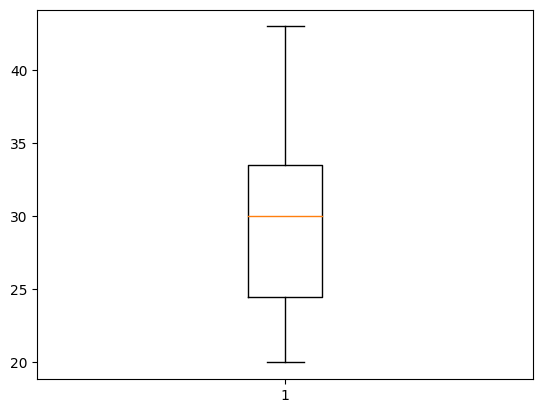

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(lista_idades)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a80e905bdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a80e9058c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a80e905bbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a80e8a040a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a80e8a043a0>],
 'means': []}

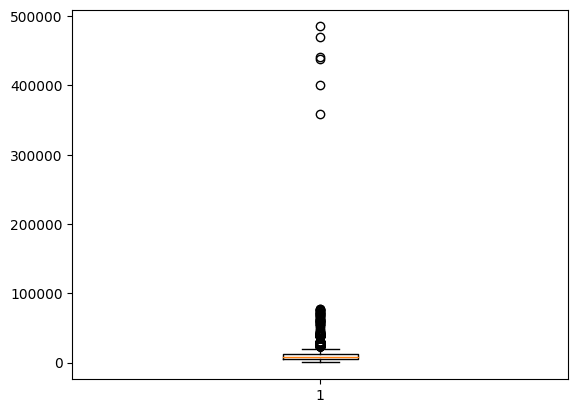

In [ ]:
plt.boxplot(dados['SALARIO'])

In [ ]:
Q1 = dados['SALARIO'].quantile(0.25)

In [ ]:
Q3 = dados['SALARIO'].quantile(0.75)

In [ ]:
# CALCULO INTERQUARTIL
IQR = Q3 - Q1

In [ ]:
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

In [ ]:
limite_superior

22359.0

In [ ]:
limite_inferior

-5813.0

In [ ]:
media_salario = dados['SALARIO'].mean()

In [ ]:
desvio = dados['SALARIO'].std()

In [ ]:
limite_superior_2 = media_salario + (3*desvio)

In [ ]:
dados[dados['SALARIO']>limite_superior_2]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


Podemos fazer a substituição dos valores outliers pelas médias de cada faixa salarial

In [ ]:
#Substituindo os valores outliers da faixa salarial de 20 a 25 mim por mês
media_30_40 = dados[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês	') & dados['SALARIO']<limite_superior_2]['SALARIO'].mean()
media_30_40

10517.53348162023

In [ ]:
dados.loc[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']>limite_superior_2), 'SALARIO'] = media_30_40

In [ ]:
dados[dados['SALARIO']>limite_superior_2]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
#Substituindo os valores outliers da faixa salarial de 25 a 30 mil por mês
media_25_30 = dados[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & dados['SALARIO']<limite_superior_2]['SALARIO'].mean()
media_25_30

10227.42404599505

In [ ]:
dados.loc[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês')&(dados['SALARIO']>limite_superior_2), 'SALARIO'] = media_25_30

In [ ]:
dados[dados['SALARIO']>limite_superior_2]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


{'whiskers': [<matplotlib.lines.Line2D at 0x7a80e8f94f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7a80e8f95480>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a80e8f94c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7a80e8f959c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a80e8f95c60>],
 'means': []}

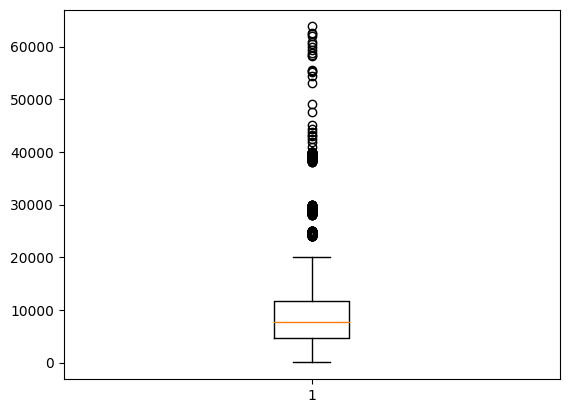

In [ ]:
plt.boxplot(dados['SALARIO'])

# Distribuição amostral e intervalo de confiança

In [ ]:
salario = dados['SALARIO']

In [ ]:
media_amostral_salario = np.mean(salario)
media_amostral_salario

9693.535040346234

In [ ]:
desvio_salario = np.std(salario)
desvio_salario

7748.6605977141535

In [ ]:
nivel_confianca = 0.95

In [ ]:
tamanho_amostra = len(salario)
tamanho_amostra

4271

In [ ]:
#erro padrão
from scipy import stats
erro_padrao = stats.sem(salario)
erro_padrao

118.58034268712397

In [ ]:
# intervalo de confiança
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra-1, loc=media_amostral_salario, scale=erro_padrao)
intervalo_confianca

(9461.055941715484, 9926.014138976985)

In [ ]:
nivel_confianca_90 = 0.90

In [ ]:
idade = dados['IDADE']

In [ ]:
media_idade = np.mean(idade)
media_idade

31.153517220250375

In [ ]:
desvio_idade = np.std(idade)
desvio_idade

6.854238421066857

In [ ]:
# intervalo de confiança da variável IDADE
intervalo_confianca_idade = stats.t.interval(nivel_confianca_90, tamanho_amostra-1, loc=media_idade, scale=erro_padrao)
intervalo_confianca_idade

(-163.93611471272234, 226.243149153223)

In [ ]:
# média salarial por cargo e por genero
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4271 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
# media salarial por cargo
dados.groupby(['CARGO ATUAL', 'GENERO'], dropna=False)['SALARIO'].mean()

CARGO ATUAL                                                          GENERO              
Analista de BI/BI Analyst                                            Feminino                 5545.216495
                                                                     Masculino                6579.539286
                                                                     Prefiro não informar     2104.000000
Analista de Dados/Data Analyst                                       Feminino                 7519.989418
                                                                     Masculino                7391.130045
                                                                     Prefiro não informar     6827.500000
Analista de Inteligência de Mercado/Market Intelligence              Feminino                 6938.166667
                                                                     Masculino                5309.217391
Analista de Marketing                                                Feminino                 4432.000000
                                                                     Masculino                5386.909091
Analista de Negócios/Business Analyst                                Feminino                 7767.976744
                                                                     Masculino                8191.500000
Analista de Suporte/Analista Técnico                                 Feminino                 2652.272727
                                                                     Masculino                4376.593220
                                                                     Prefiro não informar     1540.000000
Analytics Engineer                                                   Feminino                11501.058824
                                                                     Masculino               11065.498567
Cientista de Dados/Data Scientist                                    Feminino                 8768.007752
                                                                     Masculino               10737.056245
                                                                     Prefiro não informar     9732.333333
DBA/Administrador de Banco de Dados                                  Feminino                 4893.000000
                                                                     Masculino                9808.818182
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas          Feminino                 5140.764706
                                                                     Masculino                7704.707865
Economista                                                           Feminino                11244.200000
                                                                     Masculino                5546.272727
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect  Feminino                 9739.565657
                                                                     Masculino               10838.214458
                                                                     Prefiro não informar     8259.500000
Engenheiro de Machine Learning/ML Engineer                           Feminino                 9283.400000
                                                                     Masculino               14748.362400
Estatístico                                                          Feminino                 9572.000000
                                                                     Masculino                9803.000000
Outra Opção                                                          Feminino                 4520.195122
                                                                     Masculino                4891.964467
                                                                     Prefiro não informar     2364.000000
Outras Engenharias (não inclui dev)                                  Feminino                 

# Featuring Engineering

In [ ]:
dados['GESTOR?'].value_counts()

,count
GESTOR?,
0.0,2981
1.0,713


In [ ]:
dados['PREENCHER NIVEL'] = dados.apply(lambda row: 'Pessoa Gestora' if row['GESTOR?'] == 1.0 else row['NIVEL'], axis=1)


In [ ]:
dados['PREENCHER NIVEL']

,PREENCHER NIVEL
0,Júnior
1,Pessoa Gestora
2,Pleno
3,Sênior
4,Pleno
...,...
4266,Pleno
4267,Pleno
4268,Pessoa Gestora
4269,Júnior


In [ ]:
dados['PREENCHER NIVEL'].value_counts()

,count
PREENCHER NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa Gestora,713


Outra prática do Fearture Engineering é transformar variáveis categóricas em variáveis indicadoras, ou seja, variáveis dummies

In [ ]:
dados['NIVEL']

,NIVEL
0,Júnior
1,NaN
2,Pleno
3,Sênior
4,Pleno
...,...
4266,Pleno
4267,Pleno
4268,NaN
4269,Júnior


In [ ]:
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'PREENCHER NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno',
       'NIVEL_Sênior'],
      dtype='object')

Podemos transformar variáveis contínuas em variáveis discretas tbm.

In [ ]:
# transformada a vaivavel IDADE em variavel categórica - GERAÇAO Z, X, etc.
def determinar_geracao(idade):
  if 39 < idade <= 58:
    return 'Geração X'
  elif 29 < idade <= 39:
    return 'Millenial'
  elif 13 < idade <= 29:
    return 'Geração Z'
  else:
    return 'Outra Geração'

In [ ]:
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
dados['GERACAO'].value_counts()

,count
GERACAO,
Geração Z,1999
Millenial,1761
Geração X,511


In [ ]:
dados_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   ID                                                                                                                         4271 non-null   object
 1   Quanto tempo de experiência na área de dados você tem?                                                                     3694 non-null   object
 2   Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?  3694 non-null   object
 3   Você está satisfeito na sua empresa atual?                                                                                 3694 non-n

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 32 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4271 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
df_combined['PREENCHER NIVEL'].value_counts()

,count
PREENCHER NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa Gestora,715


In [ ]:
df_combined = dados.merge(dados_2, on='ID', how='left')

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 45 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4273 non-null   int64  
 1   ID                                                                                                                         4273 non-null   object 
 2   IDADE                                                                                                                      4273 non-null   float64
 3   FAIXA IDADE                                                                                                                4273 

In [ ]:
#esse filtro mostra como procurar uma palava especifica na coluna
df_combined['EM BUSCA'] = df_combined['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)


In [ ]:
df_combined['EM BUSCA'].value_counts()

,count
EM BUSCA,
False,2332
True,1364


In [ ]:
df_combined['ABERTO_OPORTUNIDADES'] = df_combined['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)


In [ ]:
df_combined['ABERTO_OPORTUNIDADES'].value_counts()

,count
ABERTO_OPORTUNIDADES,
False,2342
True,1354


In [ ]:
df_combined.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM BUSCA,ABERTO_OPORTUNIDADES
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True


In [ ]:
df_combined['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,2746
Parda,1054
Preta,291
Amarela,128
Prefiro não informar,26
Outra,17
Indígena,11


In [ ]:
#  criando uma nova coluna Etnia - brancas, não branca e outras
def branca_ou_outra(cor_raca_etnia):
  if cor_raca_etnia == 'Branca':
    return 'Branca'
  elif cor_raca_etnia == 'Preta':
    return 'Não Branca'
  elif cor_raca_etnia == 'Amarela':
    return 'Não Branca'
  elif cor_raca_etnia == 'Parda':
    return 'Não Branca'
  elif cor_raca_etnia == 'Indígena':
    return 'Não Branca'
  elif cor_raca_etnia == 'Não informado':
    return 'outras'
  elif cor_raca_etnia == 'Prefiro não informar':
    return 'outras'
  else:
    return 'outras'

In [ ]:
df_combined['ETNIA'] = df_combined['COR/RACA/ETNIA'].apply(branca_ou_outra)

In [ ]:
df_combined['ETNIA'].value_counts()

,count
ETNIA,
Branca,2746
Não Branca,1484
outras,43


In [ ]:
df_combined['GENERO'].value_counts()

,count
GENERO,
Masculino,3194
Feminino,1058
Prefiro não informar,21


In [ ]:
df_combined['PCD'].value_counts()

,count
PCD,
Não,4200
Sim,54
Prefiro não informar,19


In [ ]:
df_combined.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM BUSCA,ABERTO_OPORTUNIDADES,ETNIA
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,Não Branca
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,Não Branca
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,Branca
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,Branca
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,Branca


In [ ]:
df_combined.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'PREENCHER NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno',
       'NIVEL_Sênior', 'GERACAO',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Voc

In [ ]:
df_combined['UF ONDE MORA'].value_counts()

,count
UF ONDE MORA,
SP,1745
MG,478
RJ,338
PR,311
RS,204
BA,162
SC,156
DF,132
PE,120


# Correlação

Será que quanto mais velha a pessoa maior é seu salário?

In [ ]:
df_combined.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'PREENCHER NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno',
       'NIVEL_Sênior', 'GERACAO',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Voc

In [ ]:
# correlação salario e idade
correlacao_continua = df_combined['SALARIO'].corr(df_combined['IDADE'])
correlacao_continua = round(correlacao_continua, 2)
correlacao_continua

0.28

## Correlação entre variáveis discretas

Primeiramente, vamos calcular a correlação de duas variáveis discretas EDUCAÇÃO  e RAÇA.

Para isso, vamos utilizar o coeficiente de Cramer

**V de Cramer:**

$V = \sqrt{\frac{\chi^2}{n \times \text{min}(k-1, r-1)}}$


In [ ]:
# coeficiente de cramer
from scipy import stats

def cramer_v(x, y):
  tabela_cruzada = np.array(pd.crosstab(x, y))
  #teste qui-quadrado
  chi2 = stats.chi2_contingency(tabela_cruzada)[0]
  #calcular o cramer

  # calcula a soma de todos os elementos da tabela cruzada
  n = np.sum(tabela_cruzada) # número de observações

  # calcula o número de linhas e colunas da tabela cruzada
  #r, k = tabela_cruzada.shape

  # min - Retorna o mínimo de uma matriz ou o mínimo ao longo de um eixo.
  # retorna o mínimo de cada linha e coluna
  mini = min(tabela_cruzada.shape) - 1

  #coeficiente de cramer
  cramer = np.sqrt(chi2/(n*mini))
  return cramer


In [ ]:
cramer_v(df_combined['NIVEL DE ENSINO'], df_combined['COR/RACA/ETNIA'])

0.04499106580480143

In [ ]:
# existe associação entre gênero e nível de ensino
cramer_v(df_combined['GENERO'], df_combined['NIVEL DE ENSINO'])

0.076119232802818

In [ ]:
cramer_v(df_combined['NIVEL DE ENSINO'], df_combined['GENERO'])

0.076119232802818

# Salvando os dados

In [ ]:
df_combined.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM BUSCA,ABERTO_OPORTUNIDADES,ETNIA
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,Não Branca
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,Não Branca
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,Branca
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,Branca
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,Branca


In [ ]:
# salvando os dados
df_combined.to_csv('/content/drive/MyDrive/PrograMaria - Análise de Dados/dados_tratados.csv', index=False)

Se não colocarmos index=False, a tabela final terá uma coluna só com esses índices

# Conectando SQL com Pandas

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
# passando o caminho do arquivo que está no drive
conexao = sqlite3.connect('/content/drive/MyDrive/PrograMaria - Análise de Dados/Módulo 5/status_brasil')

In [ ]:
query = 'SELECT * FROM Municipios_Brasileiros mb  WHERE Cidade LIKE "Itaquaque%"'
query

'SELECT * FROM Municipios_Brasileiros mb  WHERE Cidade LIKE "Itaquaque%"'

In [ ]:
# lendo o SQL
pd.read_sql(query, con = conexao)

,Cidade,Estado,Regiao,Municipio_ID
0,Itaquaquecetuba,SP,Sudeste,5043


Será que existe uma relação entre índice de renda e o salário?

In [ ]:
pd.read_sql(query, con = conexao)

,Cidade,Estado,Regiao,Municipio_ID
0,Itaquaquecetuba,SP,Sudeste,5043


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/PrograMaria - Análise de Dados/dados_tratados.csv')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 48 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4273 non-null   int64  
 1   ID                                                                                                                         4273 non-null   object 
 2   IDADE                                                                                                                      4273 non-null   float64
 3   FAIXA IDADE                                                                                                                4273 

In [ ]:
lista_estado = list(dados['UF ONDE MORA'].unique())
#list - transforma array em lista
# unique - nos retorna o array de valores únicos


In [ ]:
query = '''SELECT
mb.Estado,
AVG(ms.renda) as avg_renda
FROM Municipios_Brasileiros mb
INNER JOIN Municipio_Status ms ON mb.Municipio_ID = ms.Municipio_ID
WHERE mb.Estado IN ({})
GROUP BY Estado
'''.format(','.join(['?' for _ in lista_estado]))

In [ ]:
# data frame na qual só retornou a colunas da query acima
estado_renda =  pd.read_sql(query, con = conexao, params = lista_estado)

Un exemplo para entender o .format

In [ ]:
a = 'batata'

In [ ]:
print('eu gosto de {}'.format(a))

eu gosto de batata


In [ ]:
a = ['batata', 'tomate', 'alface']

In [ ]:
print('Eu gosto de {}, {} e {}'.format(a[0], a[1], a[2]))

Eu gosto de batata, tomate e alface


In [ ]:
print('Eu gosto de {}'.format(','.join(a)))

Eu gosto de batata,tomate,alface


Retomando:

In [ ]:
dados.rename(columns = {'UF ONDE MORA': 'Estado'}, inplace=True)

In [ ]:
#junção dos data frames "dados" com o data frame da consulta SQL
dados = dados.merge(estado_renda, on='Estado', how='left')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 49 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4273 non-null   int64  
 1   ID                                                                                                                         4273 non-null   object 
 2   IDADE                                                                                                                      4273 non-null   float64
 3   FAIXA IDADE                                                                                                                4273 

In [ ]:
# correlação entre renda e salário
correlacao_renda_salario = dados['avg_renda'].corr(dados['SALARIO'])
correlacao_renda_salario = round(correlacao_renda_salario, 2)
correlacao_renda_salario

0.13

Fazendo a correlação de índice de educação e renda

In [ ]:
# retornando a coluna educacao e a coluna estado
query_2 = '''SELECT mb.Estado,
avg(ms.educacao) avg_educacao
FROM Municipios_Brasileiros mb
INNER JOIN Municipio_Status ms ON mb.Municipio_ID = ms.Municipio_ID
WHERE mb.Estado IN ({})
GROUP BY Estado
'''.format(','.join(['?' for _ in lista_estado]))

In [ ]:
lista_estado_2 = list(dados['Estado'].unique())

In [ ]:
lista_estado_educacao = pd.read_sql(query_2, con = conexao, params = lista_estado_2)

In [ ]:
dados = dados.merge(lista_estado_educacao, on='Estado', how='left')

In [ ]:
correlacao_educacao_salario = dados['avg_educacao'].corr(dados['SALARIO'])
correlacao_educacao_salario = round(correlacao_educacao_salario, 2)
correlacao_educacao_salario

0.16

# Visualização de Dados

In [ ]:
from google colab import drive
drive.mount('/content/drive')

SyntaxError: invalid syntax (<ipython-input-145-e00b050f7fa6>, line 1)

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/PrograMaria - Análise de Dados/dados_tratados.csv')

In [ ]:
dados.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM BUSCA,ABERTO_OPORTUNIDADES,ETNIA
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,Não Branca
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,Não Branca
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,Branca
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,Branca
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,Branca


In [ ]:
genero_counts = dados['GENERO'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

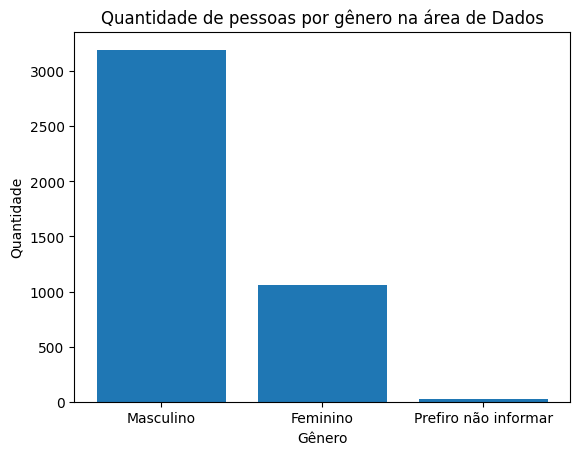

In [ ]:
# criando uma janela para o gráfico
plt.figure()
plt.bar(height = genero_counts.values, x = genero_counts.index)
plt.title('Quantidade de pessoas por gênero na área de Dados')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

plt.show() # serve para exibir o gráfico

<ipython-input-152-32d5b07b4c82>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dados, x = 'GENERO', palette = 'pastel')


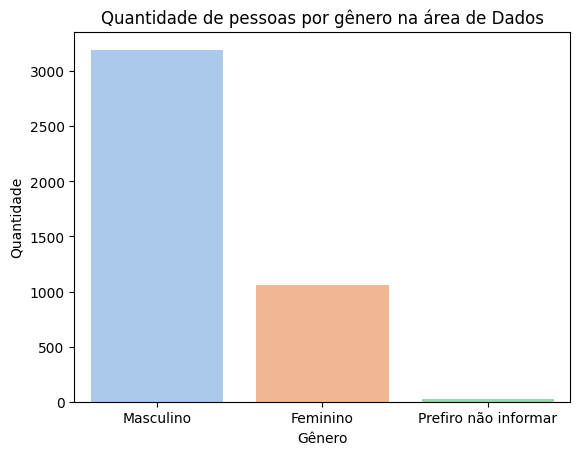

In [ ]:
import seaborn as sns

plt.figure()
sns.countplot(data = dados, x = 'GENERO', palette = 'pastel')
plt.title('Quantidade de pessoas por gênero na área de Dados')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
# plt.grid(True)
plt.show()


O salário varia com a idade?

<Axes: xlabel='IDADE'>

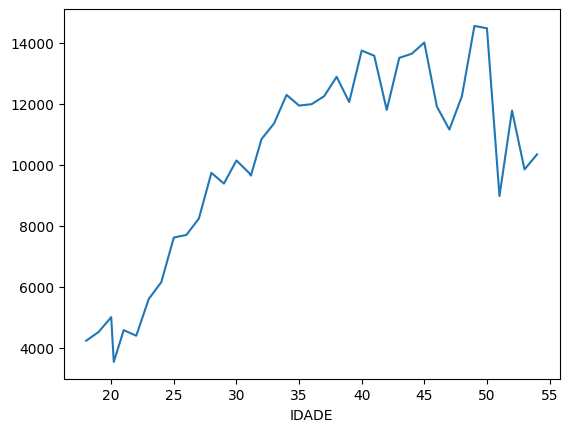

In [ ]:
# média de salário por idade

dados.groupby("IDADE")['SALARIO'].mean().plot()

In [ ]:
salario_por_idade = dados.groupby("IDADE")['SALARIO'].mean()
salario_por_idade

,SALARIO
IDADE,
18.000000,4230.307692
19.000000,4519.590909
20.000000,5004.272727
20.205479,3536.000000
21.000000,4578.737179
22.000000,4394.689815
23.000000,5602.406897
24.000000,6151.622449
25.000000,7616.392336


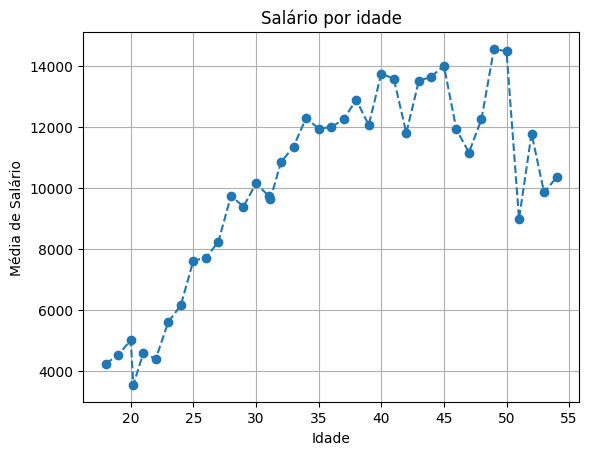

In [ ]:
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker = 'o', linestyle = '--')
plt.title('Salário por idade')
plt.xlabel('Idade')
plt.ylabel('Média de Salário')
plt.grid(True)
plt.show()


In [ ]:
# vamos usar o plotly.express para visualizações mais avançadas

import plotly.express as px

In [ ]:
fig = px.line(salario_por_idade.reset_index(), x='IDADE', y = 'SALARIO', title='Salário por Idade', markers=True)
fig.show()


Text(0, 0.5, 'Salário')

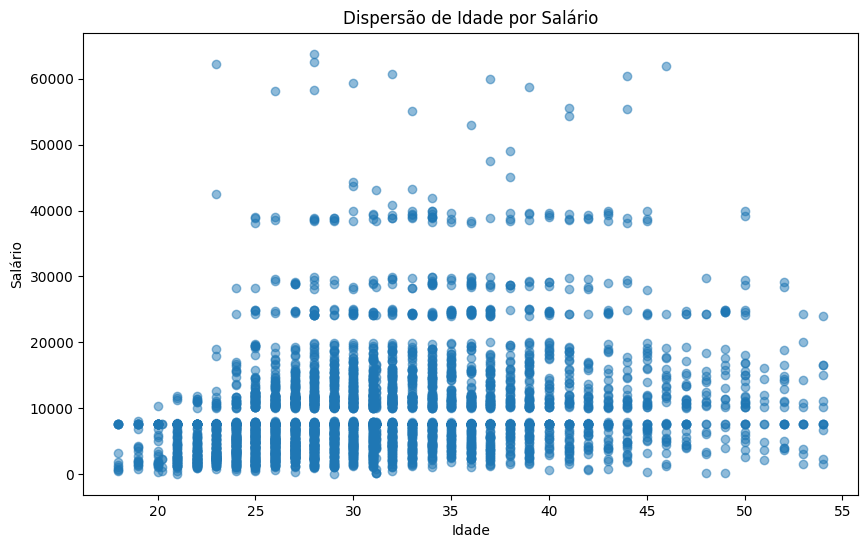

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha = 0.5)
plt.title('Dispersão de Idade por Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')

# plt.show() - é só importante quando vamos fazer um script fora do colab

In [ ]:
fig = px.scatter(dados, x='IDADE', y = 'SALARIO', title='Dispersão de Idade por Salário', opacity=0.5)
fig.show()